In [1]:
import numpy as np
import os
import gzip
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for input format 'mnist.npz'

def load_mnist_npz(mnist_npz_path,kind='train'):
    with np.load(mnist_npz_path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        
        if kind == 'train':
            return x_train, y_train
        elif kind == 'test':
            return x_test, y_test
        else:
            return False

In [3]:
# for input format '*-labels-idx1-ubyte.gz'

def load_mnist_gz(mnist_gz_dir,kind='train'):
    if kind == 'test':
        kind = 't10k'
    labels_path = os.path.join(mnist_gz_dir,'%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(mnist_gz_dir,'%s-images-idx3-ubyte.gz' % kind)
    
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
        
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels),28,28)
    
    return images, labels

In [4]:
# for input format '*-labels-idx1-ubyte'

def load_mnist_raw(mnist_raw_dir,kind='train'):
    if kind == 'test':
        kind = 't10k'
    labels_path = os.path.join(mnist_raw_dir,'%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(mnist_raw_dir,'%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
        
    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels),28,28)
    
    return images, labels

In [5]:
# test
#x_train, y_train = load_mnist_npz('./dataset/mnist.npz',kind='train')
#x_test, y_test = load_mnist_npz('./dataset/mnist.npz',kind='test')

#x_train, y_train = load_mnist_gz('./dataset/mnist_gz',kind='train')
#x_test, y_test = load_mnist_gz('./dataset/mnist_gz',kind='test')

x_train, y_train = load_mnist_raw('./dataset/mnist_raw',kind='train')
x_test, y_test = load_mnist_raw('./dataset/mnist_raw',kind='test')

print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

('x_train shape:', (60000, 28, 28))
('y_train shape:', (60000,))
('x_test shape:', (10000, 28, 28))
('y_test shape:', (10000,))


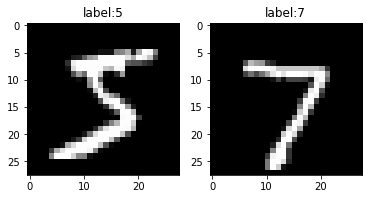

In [6]:
im_train = x_train[0]
train_label = y_train[0]

im_test = x_test[0]
test_label = y_test[0]

plt.subplot(1,2,1)
plt.title('label:'+str(train_label))
plt.imshow(im_train,cmap='gray')

plt.subplot(1,2,2)
plt.title('label:'+str(test_label))
plt.imshow(im_test,cmap='gray')

plt.show()